In [ ]:
#pip install pandas sqlite3

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
from scipy.stats import zscore #To explore the dataset and spot ouliers


In [6]:
# Connect to the SQLite database
conn = sqlite3.connect('../Customer_Behavior.db')

# Define your SQL query
query = "SELECT * FROM E_Comm_Customer_Behavior"

# Use pandas to execute the query and read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [7]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [8]:
df

Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold      1120.20   
1            102    Male   34    Los Angeles          Silver       780.50   
2            103  Female   43        Chicago          Bronze       510.75   
3            104    Male   30  San Francisco            Gold      1480.30   
4            105    Male   27          Miami          Silver       720.40   
..           ...     ...  ...            ...             ...          ...   
345          446    Male   32          Miami          Silver       660.30   
346          447  Female   36        Houston          Bronze       470.50   
347          448  Female   30       New York            Gold      1190.80   
348          449    Male   34    Los Angeles          Silver       780.20   
349          450  Female   43        Chicago          Bronze       515.75   

     Items Purchased  Average Rating Discount Applied  \
0                 14             4.6             TRUE   
1                 11             4.1            FALSE   
2                  9             3.4             TRUE   
3                 19             4.7            FALSE   
4                 13             4.0             TRUE   
..               ...             ...              ...   
345               10             3.8             TRUE   
346                8             3.0            FALSE   
347               16             4.5             TRUE   
348               11             4.2            FALSE   
349               10             3.3             TRUE   

     Days Since Last Purchase Satisfaction Level  
0                          25          Satisfied  
1                          18            Neutral  
2                          42        Unsatisfied  
3                          12          Satisfied  
4                          55        Unsatisfied  
..                        ...                ...  
345                        42        Unsatisfied  
346                        27            Neutral  
347                        28          Satisfied  
348                        21            Neutral  
349                        49        Unsatisfied  

[350 rows x 11 columns]

In [9]:
df.describe()


Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350.000000   350.000000       350.000000      350.000000   
mean    275.500000   33.597143   845.381714        12.600000        4.019143   
std     101.180532    4.870882   362.058695         4.155984        0.580539   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.250000   30.000000   502.000000         9.000000        3.500000   
50%     275.500000   32.500000   775.200000        12.000000        4.100000   
75%     362.750000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                350.000000  
mean                  26.588571  
std                   13.440813  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                   38.000000  
max                   63.000000

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    object 
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 30.2+ KB


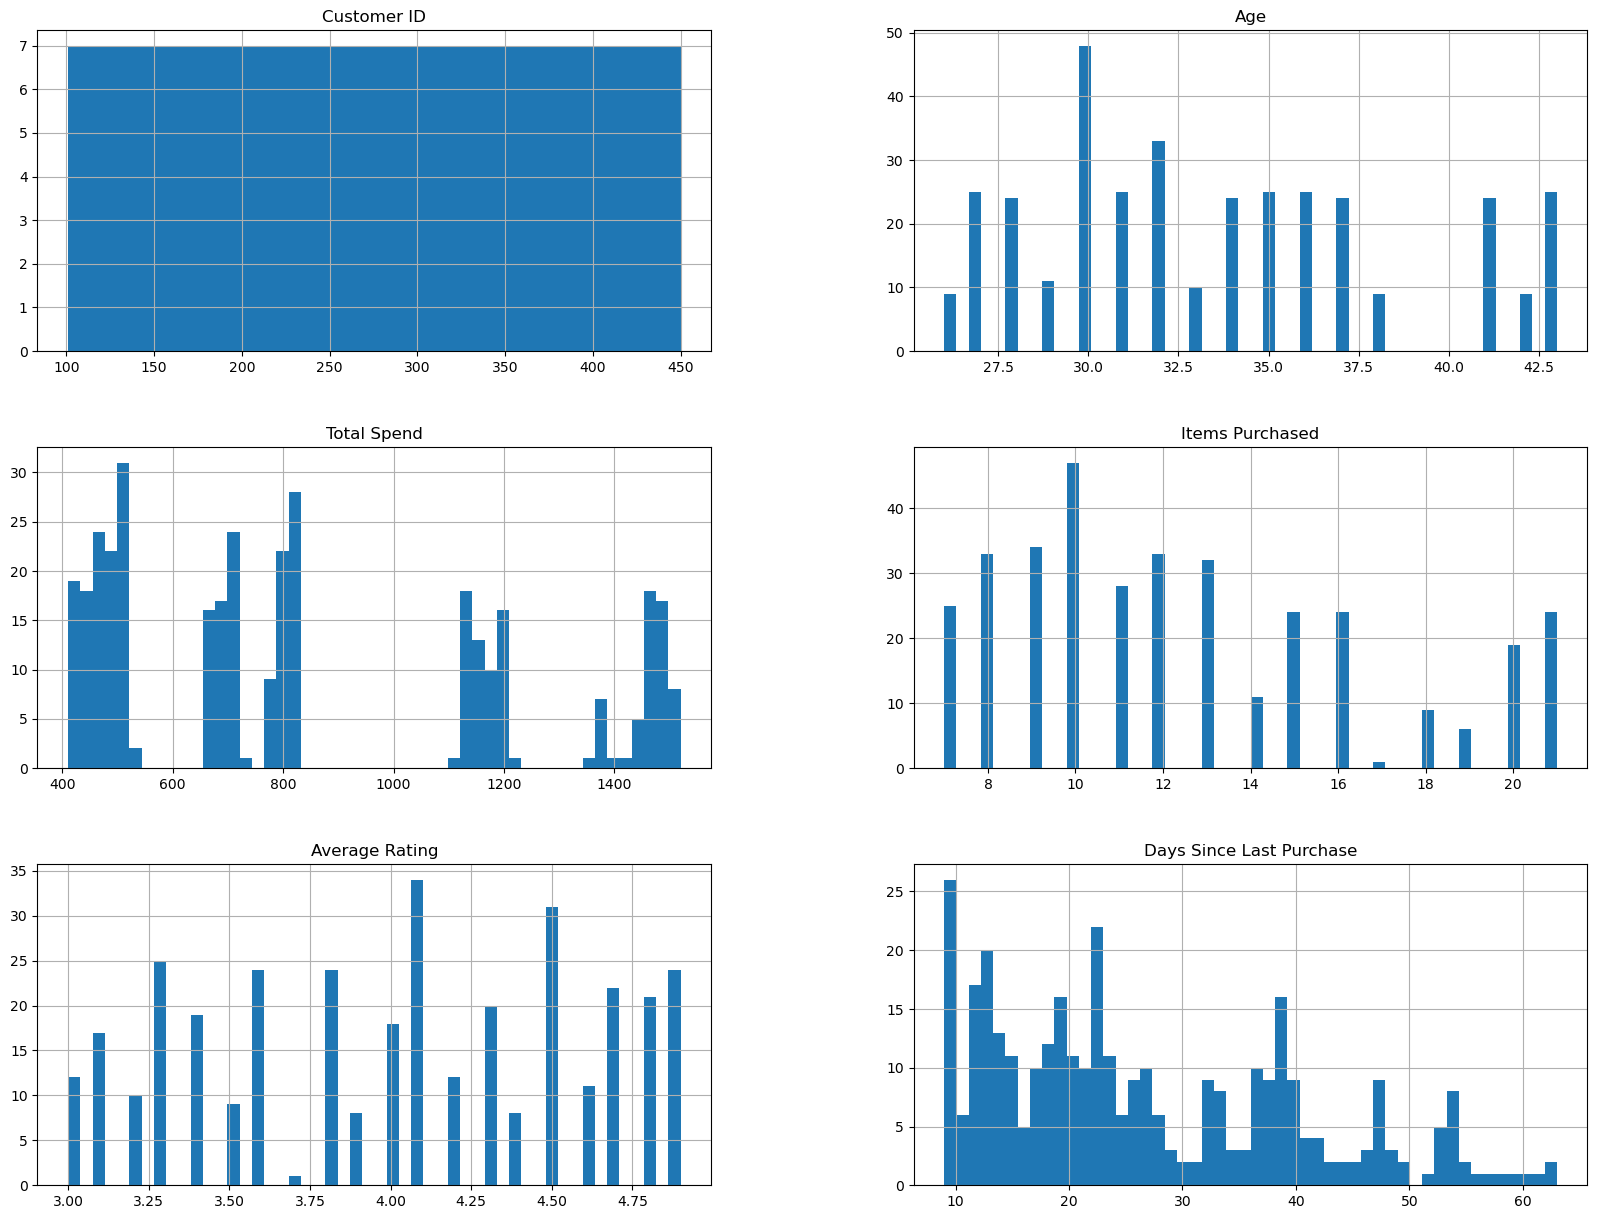

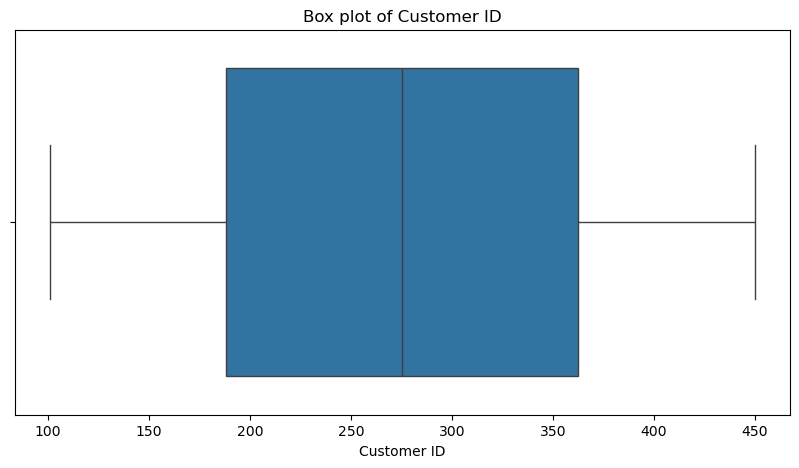

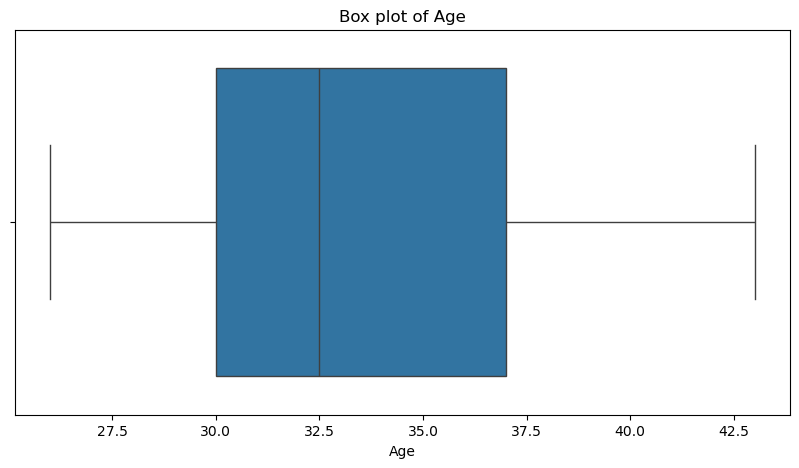

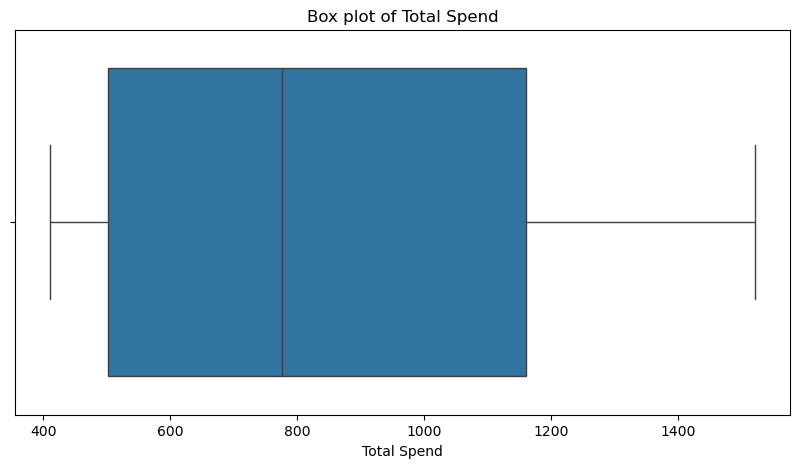

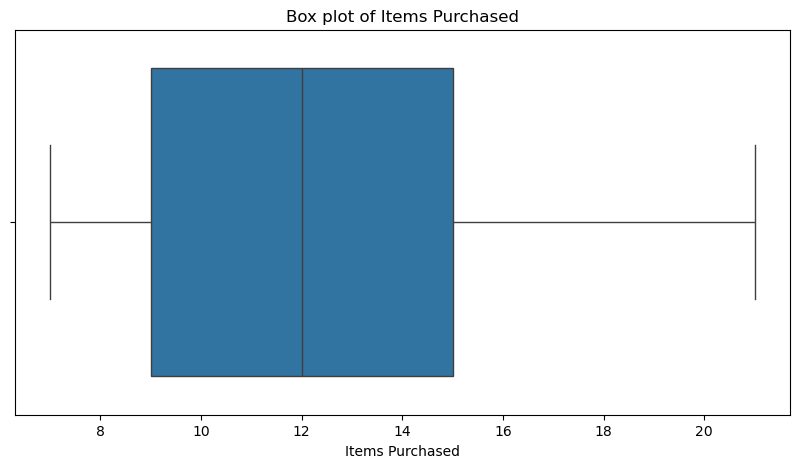

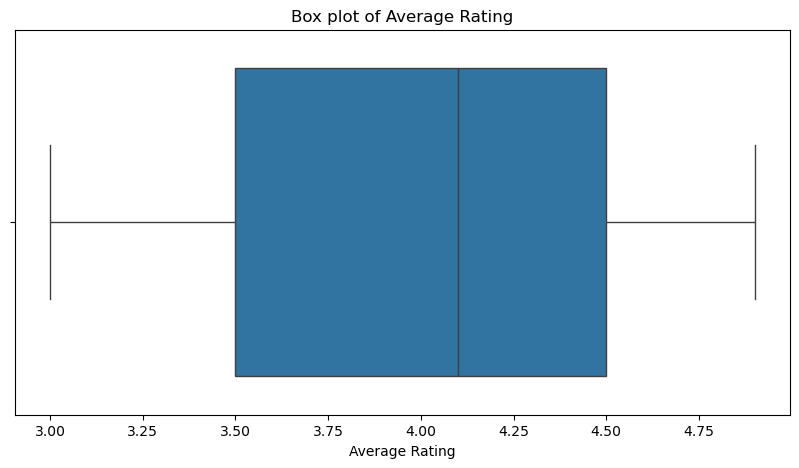

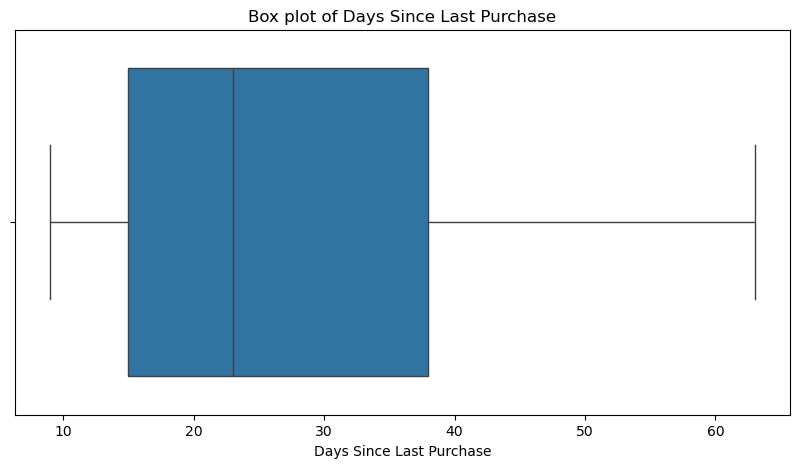

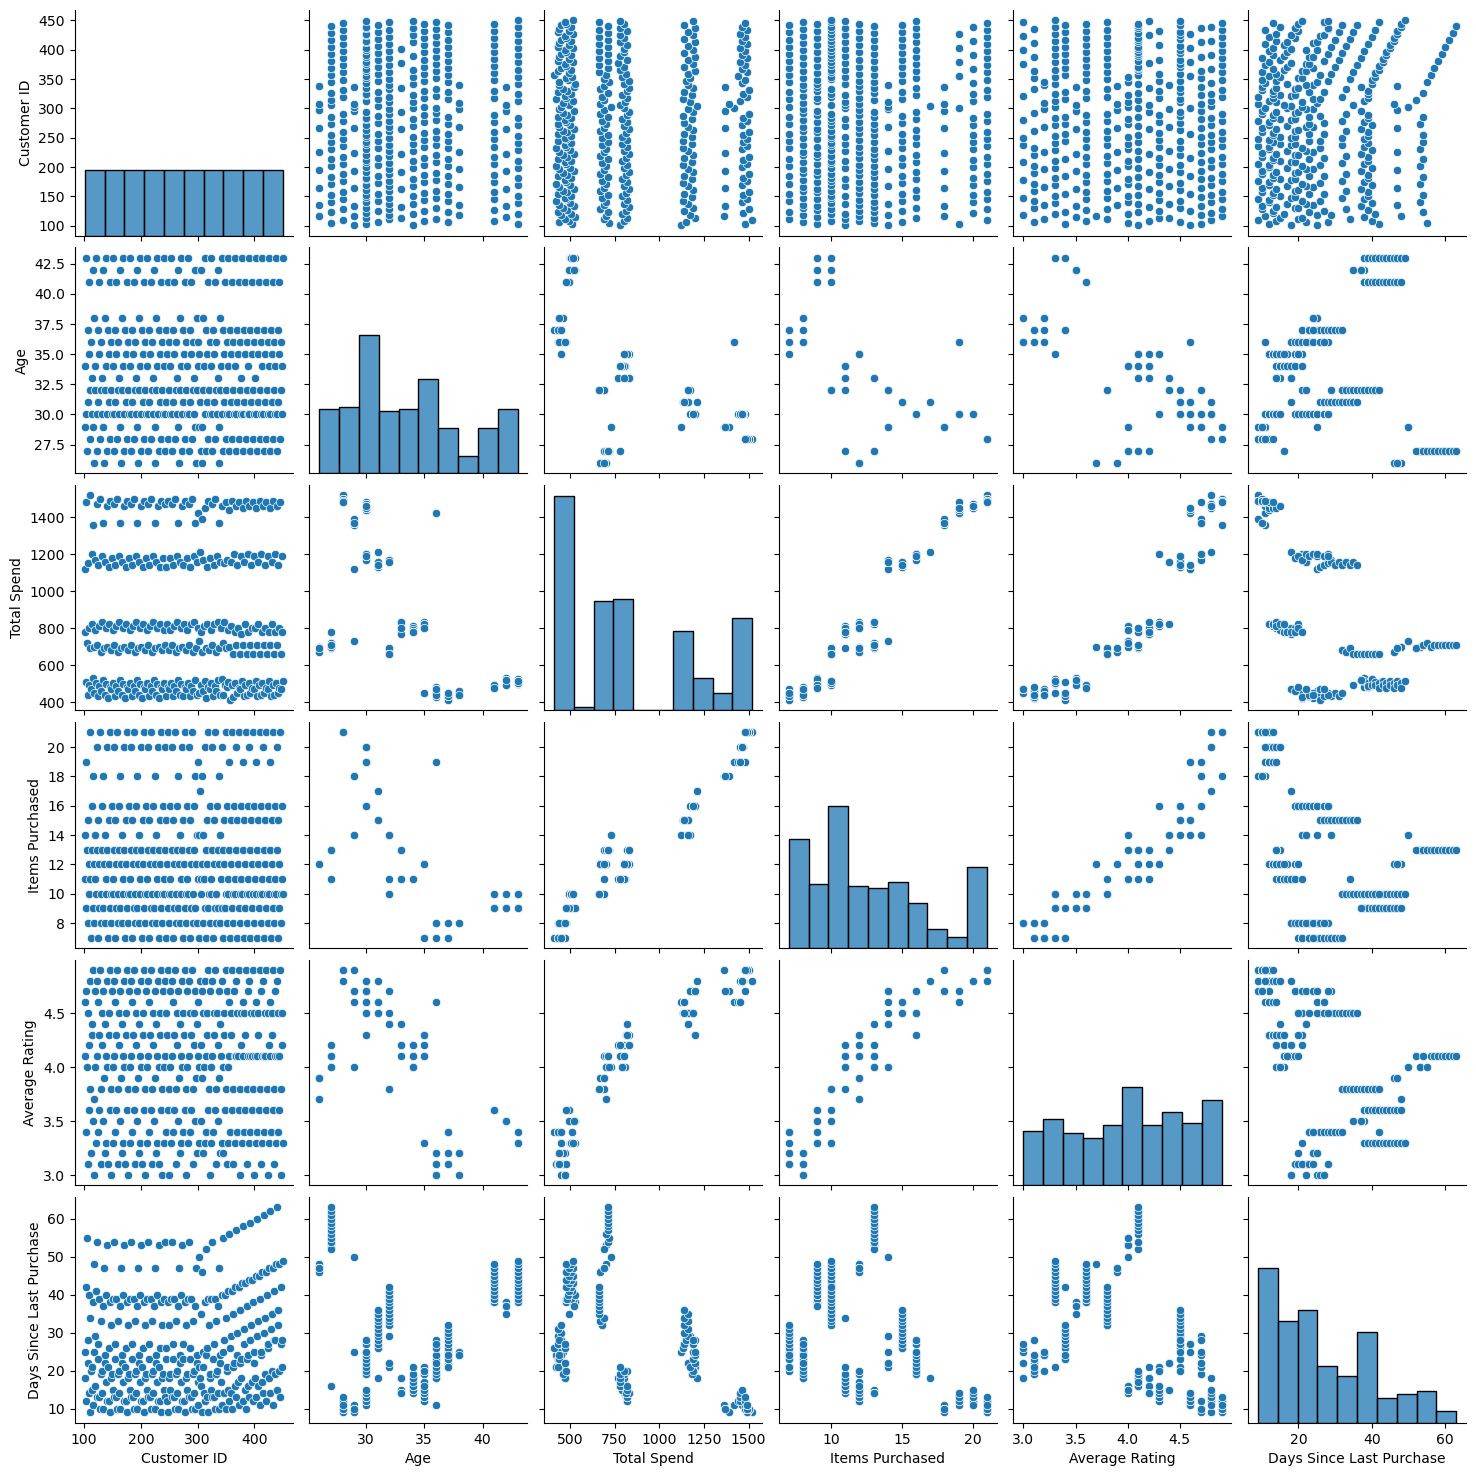

In [11]:
# Histograms for numerical columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots to identify outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Pair plots for visualizing relationships between numerical features
sns.pairplot(df)
plt.show()


In [12]:
# Calculate Z-scores for numerical columns
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)


In [13]:
z_scores


Customer ID       Age  Total Spend  Items Purchased  Average Rating  \
0      -1.727109 -0.945152     0.760130         0.337346        1.001981   
1      -1.717212  0.082826    -0.179459        -0.385538        0.139479   
2      -1.707314  1.933185    -0.925570        -0.867461       -1.068024   
3      -1.697417 -0.739557     1.756144         1.542153        1.174482   
4      -1.687519 -1.356343    -0.345692         0.096385       -0.033022   
..           ...       ...          ...              ...             ...   
345     1.687519 -0.328365    -0.511924        -0.626500       -0.378022   
346     1.697417  0.494017    -1.036899        -1.108422       -1.758026   
347     1.707314 -0.739557     0.955405         0.819269        0.829481   
348     1.717212  0.082826    -0.180289        -0.385538        0.311979   
349     1.727109  1.933185    -0.911741        -0.626500       -1.240525   

     Days Since Last Purchase  
0                   -0.118359  
1                   -0.639907  
2                    1.148256  
3                   -1.086947  
4                    2.116844  
..                        ...  
345                  1.148256  
346                  0.030654  
347                  0.105161  
348                 -0.416386  
349                  1.669803  

[350 rows x 6 columns]

In [14]:
# Identify outliers (rows with Z-scores > 3 or < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers using Z-score:")
print(outliers)


Outliers using Z-score:
Empty DataFrame
Columns: [Customer ID, Gender, Age, City, Membership Type, Total Spend, Items Purchased, Average Rating, Discount Applied, Days Since Last Purchase, Satisfaction Level]
Index: []
